# Neural Networks Deep dive Session 3

This session covers:

* activation functions
    * sigmoid
    * ReLU (linear rectifier)
* linear combinations
* gradient descent
* backpropagation

This session is more focused, with minimal "lecture".  The primary focus will be a set of unit tests. Familiarity with numpy (discussion in session 2) will make it easier to write.  Session 1 covered the general structure of artificial neural networks.  Knowledge of that structure is assumed.



In [28]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

# Activation Functions

In the original perceptron, the activation function was a simple 0 or -1.  The perceptron acts as a linear separator, and the activation function triggers when the threshold of inputs is passed.

Various other activation functions can be used to trigger a node of a neural network.  The purpose of these functions is actually to make the network nonlinear, because a combination of linear functions is a linear function.

Although there are many possible activation functions, we will just cover two.  The sigmoid function, which serves to "squash" the output of a node to a limited range.  This is the traditional activation function.  We'll also look at the linear rectifier, which is simpler and in more common use in deep learning.

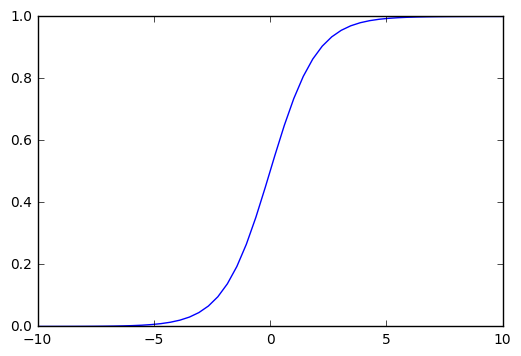

In [4]:
# here's the graph of one sigmoid function, the logistic function.

x = np.linspace(-10,10)
y = 1./(1+np.power(np.e, -x))
plt.plot(x,y)

# as you can see, it gets the name sigmoid from its S shape
# One benefit of this function (vs the true/false of a perceptron):
# it is differentiable at all points.

(-1, 10)

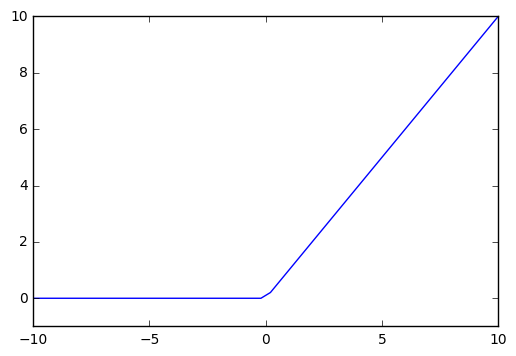

In [6]:
# the linear rectifier is even simpler

y = np.maximum(0, x)

plt.plot(x,y)
plt.ylim(-1, 10)

# it gets it's name from a electrical circuit that blocks
# current in the negative direction

# Linear combinations

A linear combination is simply a linear function, or a sum.  There is no change in this component vs the summation in a perceptron.

$$ y = w_{1}x_1 + ... w_{n}x_n $$

Note that the unit test for linear combination inputs multiple "rows" of ``x``s. While the code can be clearer and simpler to read, it can be tricky to get the dimensions of the operands correct.

In [13]:
# this example serves to help with broadcasting in numpy

x = np.arange(0,100).reshape(10,10)+1
# 1 is added to all elements of a
w = np.array((0,0,0,0,1,0,0,0,0,1))

# x is 10x10
# w is 10
# when w and x are multiplied together
# w is multiplied against each row of x

print(w*x)

[[  0   0   0   0   5   0   0   0   0  10]
 [  0   0   0   0  15   0   0   0   0  20]
 [  0   0   0   0  25   0   0   0   0  30]
 [  0   0   0   0  35   0   0   0   0  40]
 [  0   0   0   0  45   0   0   0   0  50]
 [  0   0   0   0  55   0   0   0   0  60]
 [  0   0   0   0  65   0   0   0   0  70]
 [  0   0   0   0  75   0   0   0   0  80]
 [  0   0   0   0  85   0   0   0   0  90]
 [  0   0   0   0  95   0   0   0   0 100]]


# Gradient Descent

Imagine you are trying to get to a valley between mountains as fast as possible (ignore the possibility of injury). You pick the direction with the steepest slope.  This is gradient descent.  In this case the bottom if the valley is the area with least error.



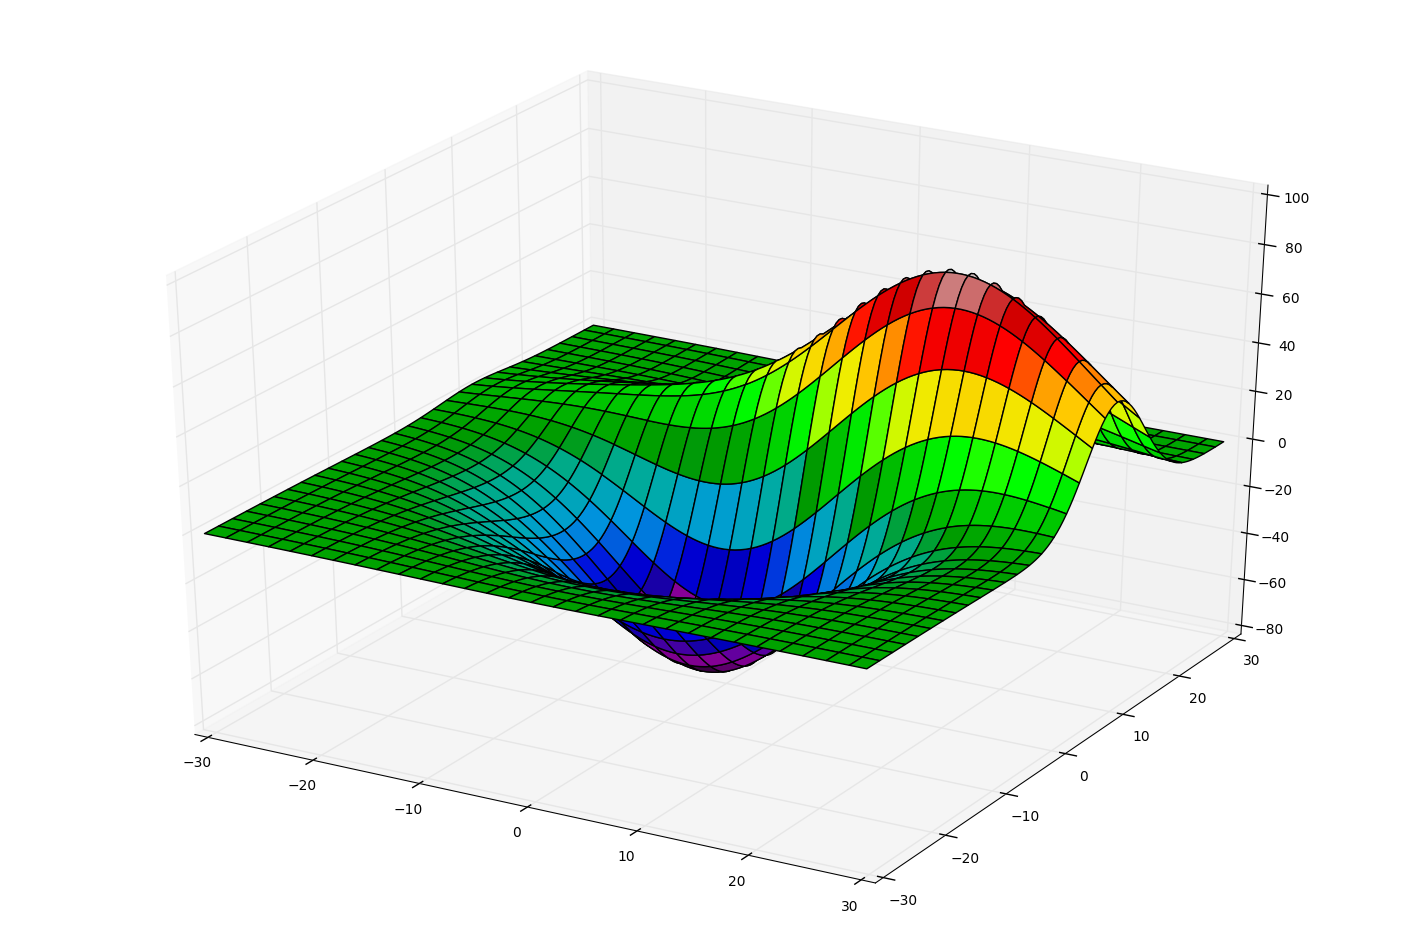

In [32]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.cm import spectral
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111, projection='3d')

# of course, the dimensionfigsize=ality will be much larger than 3d.

x, y, z = axes3d.get_test_data(0.05)
ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=spectral)

# Backpropagation


Once we figure out which way to go down a gradient, we have to adjust the weights in our neural network. The mechanism for doing this is backpropagation of error. We want to distribute the error back through the network in little pieces.  The mechanism for doing this is the chain rule of calculus.  However, we don't have to do calculus each time we build a network.  The functions we use are limited, and the graph structure of a network simplifies the process.

1. I highly suggest [this lecture](https://youtu.be/GZTvxoSHZIo). It walks through the process of backpropagation of a computational graph.
2. What is a computational graph? [Look here](https://colah.github.io/posts/2015-08-Backprop/)
3. [This page](http://cs231n.github.io/neural-networks-case-study/) also from cs231n, goes through a similar process to ours.  However, it is more concise.

# What's next?

Now that we understand the components of a neural network, and a bit about vectorized computing, next session we will look at utilizing frameworks for deep learning.

* Session 4 will focus on installation and use of tensor flow.
* Session 5 will add some frameworks (Keras and/or TFLearn) on top of tensor flow.  Here you'll see the elements we explored here return!
* Session 6 will be free form. You've learned the components of deep learning.  Now build something.